In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('TG-Energy.csv')
df.head()

,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load
0,NIZAMABAD,ARMOOR,BHEEMGAL,BHEEMGAL-RURAL,BABANAGER,5,Agriculture,328,0,0,1662.5
1,NIZAMABAD,ARMOOR,BHEEMGAL,BHEEMGAL-RURAL,BACHANPALLI,5,Agriculture,240,0,0,1200.0
2,NIZAMABAD,ARMOOR,BHEEMGAL,BHEEMGAL-RURAL,BEJJORA,5,Agriculture,337,0,0,1687.5
3,NIZAMABAD,ARMOOR,BHEEMGAL,BHEEMGAL-RURAL,DEVAKKAPET,5,Agriculture,496,0,0,2476.0
4,NIZAMABAD,ARMOOR,BHEEMGAL,BHEEMGAL-RURAL,DEVANPALLI,5,Agriculture,267,2,2011,1347.5


In [3]:
df.tail(5)

,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load
8021,BHADRADRI KOTHAGUDEM,PALONCHA,PALVANCHA,PALVONCHA RURAL,KESHAVAPURAM,5,Agriculture,31,0,0,155.0
8022,BHADRADRI KOTHAGUDEM,PALONCHA,PALVANCHA,PALVONCHA RURAL,KODIPUNJULAWAGU,5,Agriculture,78,0,0,390.0
8023,BHADRADRI KOTHAGUDEM,PALONCHA,PALVANCHA,PALVONCHA RURAL,KOTHURU,5,Agriculture,15,0,0,75.0
8024,BHADRADRI KOTHAGUDEM,PALONCHA,PALVANCHA,PALVONCHA RURAL,LAXMIDEVI PALLI(V),5,Agriculture,8,0,0,40.0
8025,BHADRADRI KOTHAGUDEM,PALONCHA,PALVANCHA,PALVONCHA RURAL,MALLARAM,5,Agriculture,26,0,0,130.0


In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

Circle            0
Division          0
SubDivision       0
Section           0
Area              0
CatCode           0
CatDesc           0
TotServices       0
BilledServices    0
Units             0
Load              0
dtype: int64

In [6]:
df.shape

(8026, 11)

In [7]:
df.columns

Index(['Circle', 'Division', 'SubDivision', 'Section', 'Area', 'CatCode',
       'CatDesc', 'TotServices', 'BilledServices', 'Units', 'Load'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8026 entries, 0 to 8025
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Circle          8026 non-null   object 
 1   Division        8026 non-null   object 
 2   SubDivision     8026 non-null   object 
 3   Section         8026 non-null   object 
 4   Area            8026 non-null   object 
 5   CatCode         8026 non-null   int64  
 6   CatDesc         8026 non-null   object 
 7   TotServices     8026 non-null   int64  
 8   BilledServices  8026 non-null   int64  
 9   Units           8026 non-null   int64  
 10  Load            8026 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 689.9+ KB


In [9]:
df.dtypes

Circle             object
Division           object
SubDivision        object
Section            object
Area               object
CatCode             int64
CatDesc            object
TotServices         int64
BilledServices      int64
Units               int64
Load              float64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df_encoded = pd.get_dummies(df,drop_first=True)

In [12]:
df['Area'] = le.fit_transform(df['Area'])

In [13]:
df.Area

0        398
1        411
2        597
3       1386
4       1390
        ... 
8021    2906
8022    2996
8023    3235
8024    3494
8025    3760
Name: Area, Length: 8026, dtype: int32

In [14]:
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [15]:
df.head()

,Circle,Division,SubDivision,Section,Area,CatCode,CatDesc,TotServices,BilledServices,Units,Load
0,13,1,14,45,398,5,0,328,0,0,1662.5
1,13,1,14,45,411,5,0,240,0,0,1200.0
2,13,1,14,45,597,5,0,337,0,0,1687.5
3,13,1,14,45,1386,5,0,496,0,0,2476.0
4,13,1,14,45,1390,5,0,267,2,2011,1347.5


In [16]:
X = df.drop(['Units'],axis=1)

In [17]:
y = df.Units

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [20]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
y_test = model.predict(X_test)

In [22]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
model_test =model.predict(X_test)
model_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,model_test))

1.0


In [25]:
import joblib

In [26]:
joblib.dump(model,"model.h5")

['model.h5']

In [27]:
model = joblib.load("model.h5")

In [28]:
# Group by Area and sum the power consumption (Units or Load)
area_consumption = df.groupby('Area')['Units'].sum().reset_index()

In [29]:
area_consumption_sorted = area_consumption.sort_values(by='Units', ascending=False)

In [30]:
print(area_consumption_sorted)

      Area  Units
3817  3817  68694
3724  3724  30930
3244  3244  28112
4406  4406  23693
351    351  22373
...    ...    ...
2334  2334      0
2333  2333      0
2332  2332      0
2331  2331      0
6960  6960      0

[6961 rows x 2 columns]


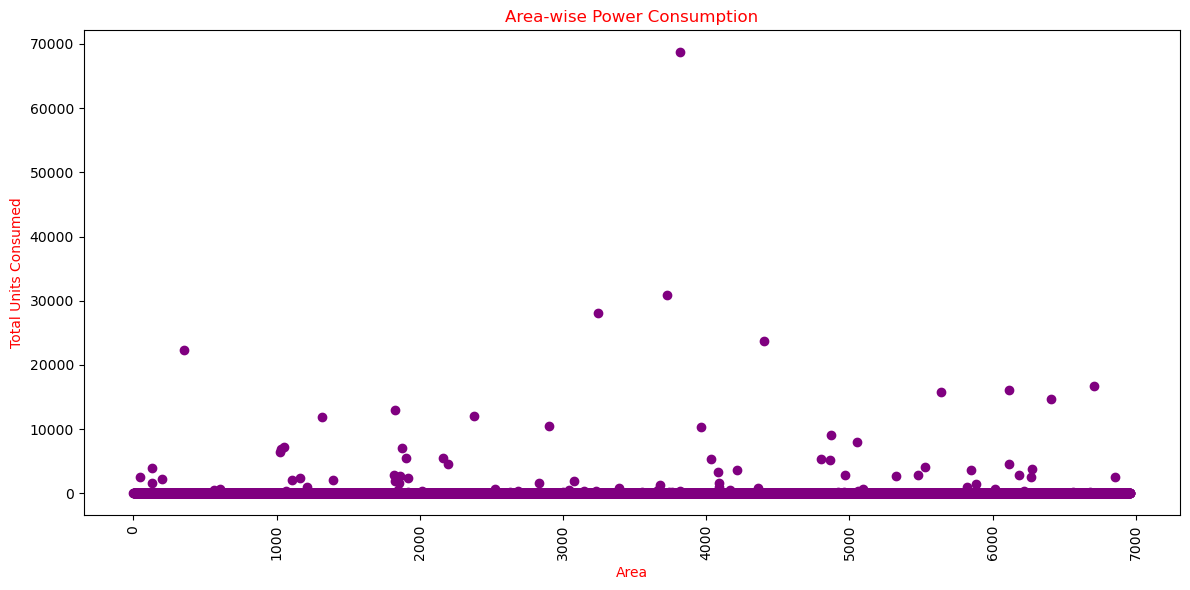

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.scatter(area_consumption_sorted['Area'], area_consumption_sorted['Units'],color='purple')
plt.xlabel('Area',color='red')
plt.ylabel('Total Units Consumed',color='red')
plt.title('Area-wise Power Consumption',color='red')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

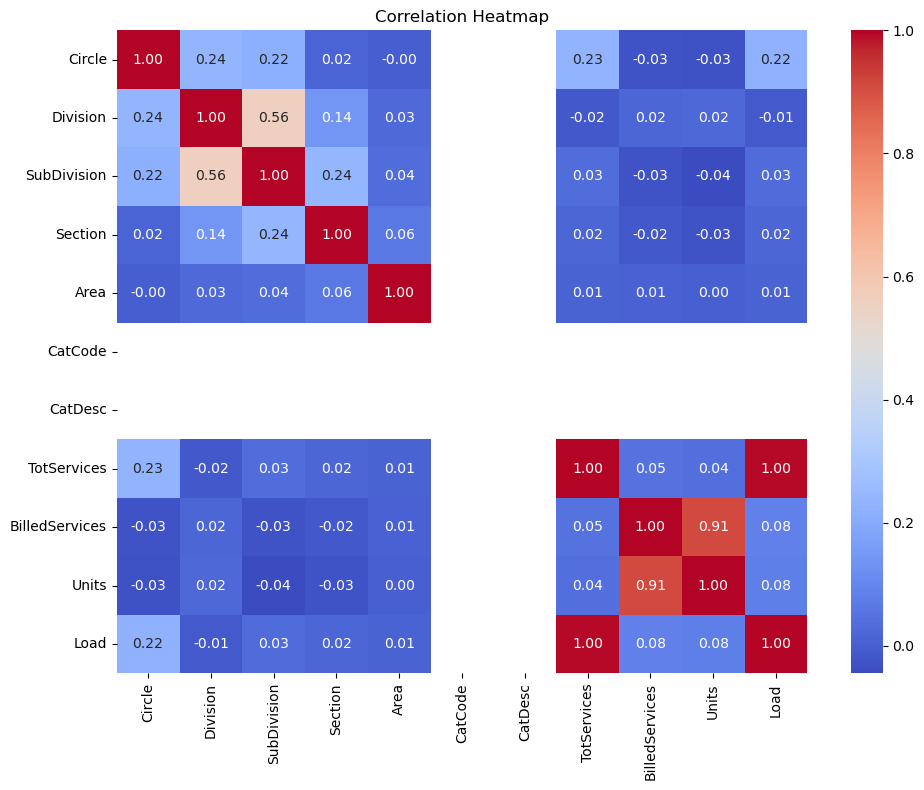

In [32]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


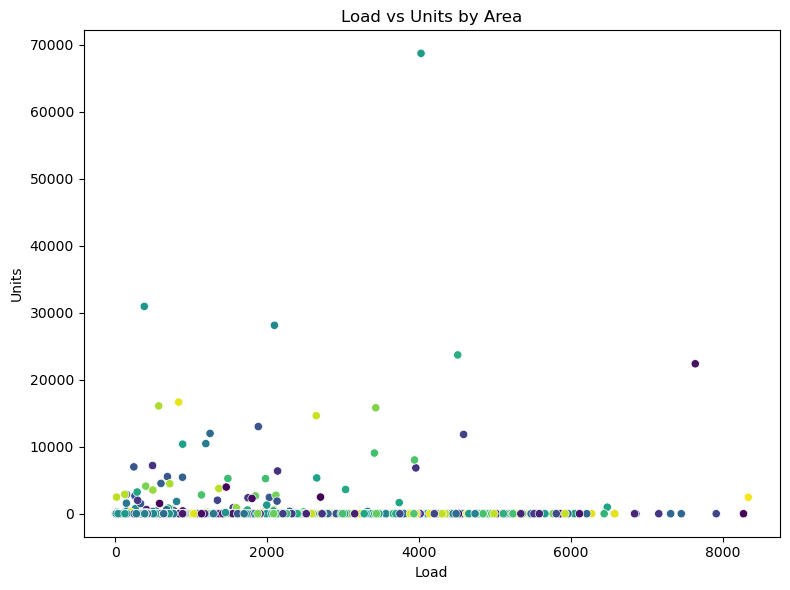

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Load', y='Units', data=df, hue='Area', palette='viridis', legend=False)
plt.title('Load vs Units by Area')
plt.xlabel('Load')
plt.ylabel('Units')
plt.tight_layout()
plt.show()


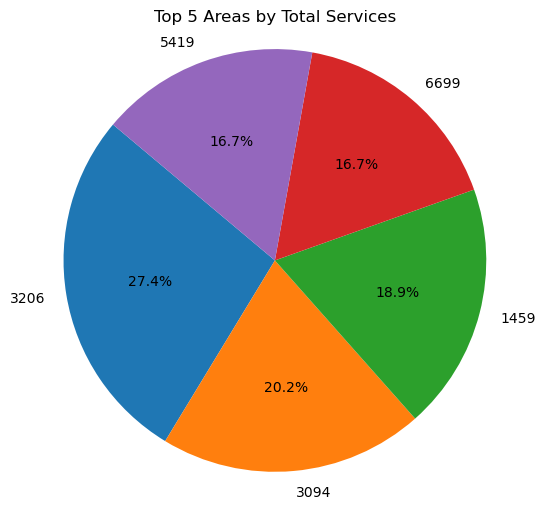

In [34]:
top_areas = df.groupby('Area')['TotServices'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(6,6))
plt.pie(top_areas, labels=top_areas.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Areas by Total Services')
plt.axis('equal')
plt.show()


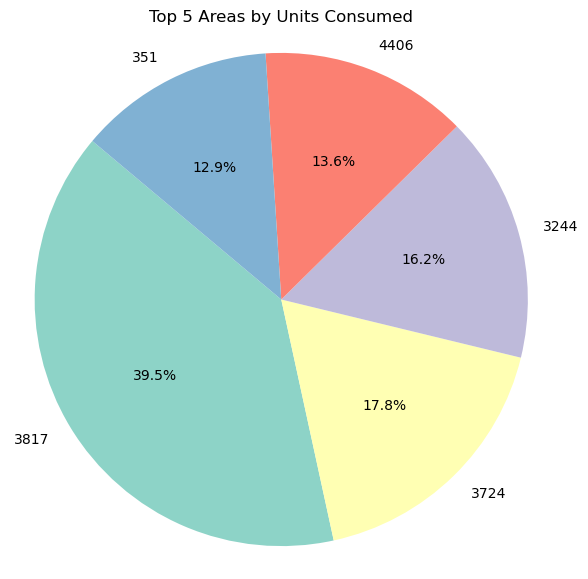

In [35]:
import matplotlib.pyplot as plt

# Group by Area and sum the Units consumed
area_units = df.groupby('Area')['Units'].sum()

# (Optional) Show only top 5 consuming areas to avoid clutter
top_areas = area_units.sort_values(ascending=False).head(5)

# Plot
plt.figure(figsize=(7,7))
plt.pie(top_areas, labels=top_areas.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set3.colors)
plt.title('Top 5 Areas by Units Consumed')
plt.axis('equal')  # Makes it a circle
plt.show()


In [85]:
df['CatDesc'] = df['CatDesc'].astype('category')
df['CatCode'] = df['CatDesc'].cat.codes

In [87]:
features = ['TotServices', 'BilledServices', 'Units', 'Load']
X = df[features]

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [90]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

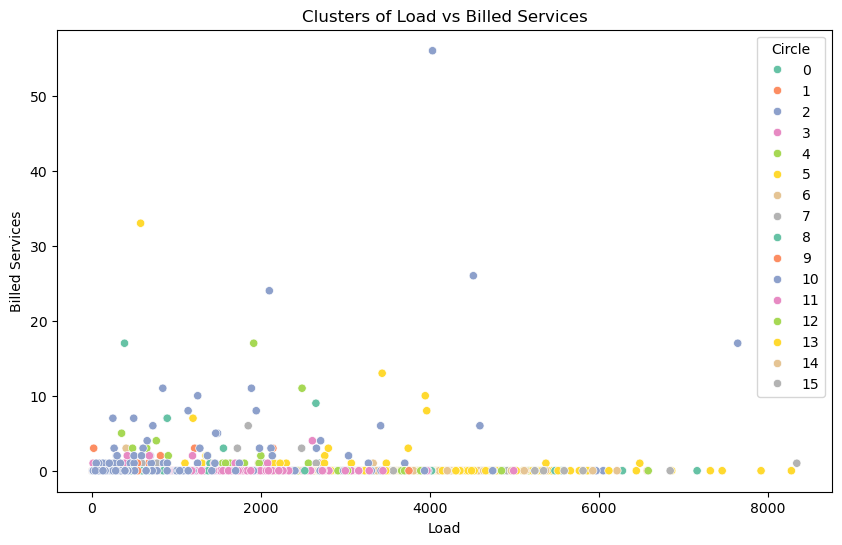

In [105]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Load', y='BilledServices', hue='Circle', data=df,palette='Set2')
plt.title('Clusters of Load vs Billed Services')
plt.xlabel('Load')
plt.ylabel('Billed Services')
plt.show()

In [109]:
df['Unbilled'] = df['TotServices'] - df['BilledServices']

In [111]:
high_unbilled = df[df['Unbilled'] > 0].sort_values(by='Load', ascending=False)

In [113]:
print("Top Unbilled High-Load Areas:")
print(high_unbilled[['Area', 'Load', 'Unbilled']].head(10))

Top Unbilled High-Load Areas:
      Area    Load  Unbilled
588   6851  8338.0      1659
4117    82  8274.0      1655
827   1477  7915.0      1584
7854   351  7639.0       766
4825  2299  7455.0      1490
1053  2277  7315.0      1462
2776  1075  7158.5      1418
1145  1864  6858.0      1370
4744   722  6840.0      1349
3861  6636  6580.0      1316
